In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Reading the dataset
import pandas as pd
import numpy as np

In [69]:
data=pd.read_csv('Train.csv', encoding='latin')
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(10)

Shape before deleting duplicate values: (284780, 8)
Shape After deleting duplicate values: (282159, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35


In [70]:
data.shape

(282159, 8)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282159 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    282159 non-null  int64  
 1   StockCode    282159 non-null  int64  
 2   Description  282159 non-null  int64  
 3   Quantity     282159 non-null  int64  
 4   InvoiceDate  282159 non-null  object 
 5   UnitPrice    282159 non-null  float64
 6   CustomerID   282159 non-null  float64
 7   Country      282159 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.4+ MB


In [72]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [73]:
data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000
mean,9949.557267,1573.707527,2024.261955,12.109885,3.460501,15283.444366,32.805964
std,5547.353569,843.814154,1089.992911,296.463809,78.762448,1714.633177,6.768422
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,942.000000,1141.000000,2.000000,1.250000,13947.000000,35.000000
50%,10294.000000,1522.000000,1987.000000,5.000000,1.950000,15147.000000,35.000000
75%,14640.000000,2106.000000,2945.000000,12.000000,3.750000,16791.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


array([[<AxesSubplot:title={'center':'StockCode'}>,
        <AxesSubplot:title={'center':'Description'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

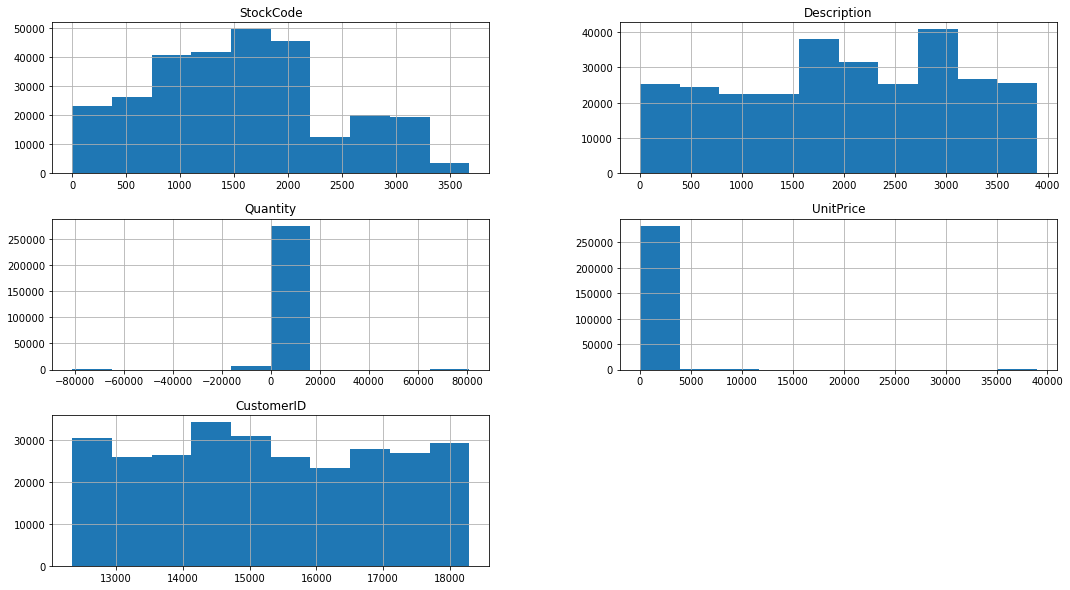

In [43]:
data.hist(['StockCode','Description','Quantity','UnitPrice','CustomerID' ], figsize=(18,10))

In [74]:
ContinuousCols=['StockCode','Description','Quantity','UnitPrice','CustomerID' ]
cdata=data[ContinuousCols].corr()
cdata

,StockCode,Description,Quantity,UnitPrice,CustomerID
StockCode,1.000000,-0.013277,-0.000987,0.020139,0.003348
Description,-0.013277,1.000000,0.000193,-0.000416,-0.005036
Quantity,-0.000987,0.000193,1.000000,-0.000926,-0.002839
UnitPrice,0.020139,-0.000416,-0.000926,1.000000,-0.004917
CustomerID,0.003348,-0.005036,-0.002839,-0.004917,1.000000


In [63]:
# TargetVariable=['UnitPrice']
# Predictors=['StockCode','Description','Quantity','CustomerID','Country']

In [80]:
#X=data['UnitPrice']
# y=data.drop(columns=['InvoiceDate','InvoiceNo','UnitPrice'],axis=1)

In [82]:
X = np.asanyarray(data[['StockCode','Description','Quantity','CustomerID','Country']])
y = np.asanyarray(data[['UnitPrice']])

In [48]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [84]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(197511, 1)
(197511, 5)
(84648, 1)
(84648, 5)


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
dt=DecisionTreeRegressor(random_state=0)
lg=GradientBoostingRegressor()
lr=LinearRegression()
rf=RandomForestRegressor()
classifier=[('Linear Regression',lr),('DecisionTreeRegressor',dt),('GradientBoosting',lg),('RandomForest',rf)]

In [86]:
vc=VotingRegressor(estimators=classifier)
vc.fit(y_train,X_train)

VotingRegressor(estimators=[('Linear Regression',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('DecisionTreeRegressor',
                             DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction...
                            ('RandomForest',
                             RandomForestRegre

In [88]:
cases_pred = vc.predict(y_test)
cases_pred

ValueError: could not broadcast input array from shape (84648,1) into shape (84648)

In [32]:
data1=pd.read_csv('Test.csv', encoding='latin')

In [33]:
data1=data1.drop(['InvoiceNo','InvoiceDate'],axis=1)
data1

,StockCode,Description,Quantity,CustomerID,Country
0,1709,1079,3,16161.0,35
1,510,3457,1,17341.0,35
2,604,694,36,15158.0,35
3,1478,3473,2,16033.0,35
4,3216,871,1,15351.0,35
...,...,...,...,...,...
122044,2487,1289,12,15214.0,35
122045,3069,217,16,16200.0,35
122046,1419,3474,6,15555.0,35
122047,1631,1434,1,15907.0,35


In [34]:
cases_pred1 = vc.predict(data1)
cases_pred1

ValueError: could not broadcast input array from shape (122049,1) into shape (122049)

In [176]:
result = pd.DataFrame(data=cases_pred1).round(2)
result.head()

,0
0,2.57
1,1.63
2,2.59
3,2.57
4,9.06


In [171]:
result.to_csv("MachineHack_Prediction_6.csv" , index = False)